# import

In [1]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED12_data_dict = load_h5(os.path.join(current_working_dir,r"ED12_data.h5"))

# figure C

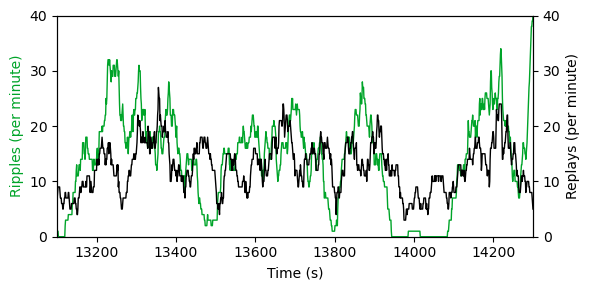

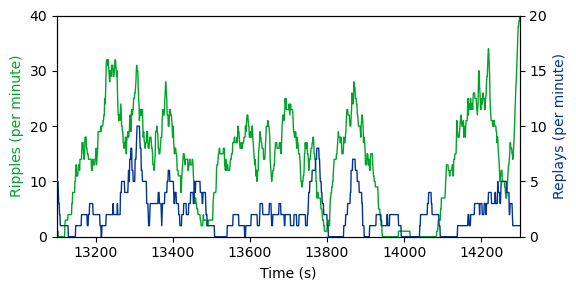

In [2]:
data = ED12_data_dict['ripple_spindle_replay_rates']

bin_centers= data['bin_centers'] 
ripple_rate= data['ripple_rate'] 
replay_rate = data['replay_rate']
spindle_rate= data['spindle_rate'] 

fig, ax1 = plt.subplots(figsize=(6, 3))

# First axis: Ripples
ax1.plot(
    bin_centers,
    convolve_movmean(ripple_rate, 30),
    label="Ripples per min",
    lw=1,
    color = "#00A429"
)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Ripples (per minute)", color = "#00A429")
ax1.set_ylim(0,40)

# Second axis: Replays
ax2 = ax1.twinx()
ax2.plot(
    bin_centers,
    convolve_movmean(replay_rate, 30),
    label="Replays per min",
    lw=1,
    color = "#000000"
)
ax2.set_ylabel("Replays (per minute)", color = "#000000")
ax2.set_ylim(0,40)

ax1.set_xlim(13100,bin_centers[-1])

plt.tight_layout()
plt.show()

######## PLOT 2

fig, ax1 = plt.subplots(figsize=(6, 3))

# First axis: Ripples
ax1.plot(
    bin_centers,
    convolve_movmean(ripple_rate, 30),
    label="spindle rate per min",
    lw=1,
    color = "#00A429"
)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Ripples (per minute)", color = "#00A429")
ax1.set_ylim(0,40)

# Second axis: Replays
ax2 = ax1.twinx()
ax2.plot(
    bin_centers,
    convolve_movmean(spindle_rate, 30),
    label="Replays per min",
    lw=1,
    color = "#003590"
)
ax2.set_ylabel("Replays (per minute)", color = "#003590")
ax2.set_ylim(0,20)

ax1.set_xlim(13100,bin_centers[-1])


plt.tight_layout()
plt.show()



# figure D

(-20.0, 20.0)

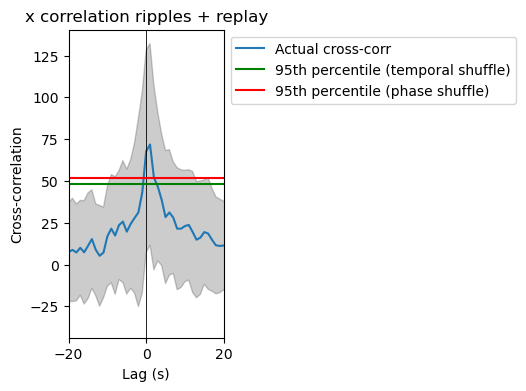

In [3]:


data = ED12_data_dict['ripple_replay_xcorr']

mean_x = data["mean_x"]
mean_y = data["mean_y"]
st_dev = data["st_dev"]

mean_y_shuf = data["mean_y_shuf"]
mean_y_shuf_2 = data["mean_y_shuf_2"]


plt.figure(figsize=(2,4))
plt.fill_between(mean_x, convolve_movmean(mean_y,2) - st_dev, convolve_movmean(mean_y,2) + st_dev, alpha=0.2, color='k')
plt.plot(mean_x, convolve_movmean(mean_y,2), label='Actual cross-corr')
plt.axvline(0, color='k', linewidth=0.6)
plt.axhline(np.percentile(mean_y_shuf,95),color = 'green',label='95th percentile (temporal shuffle)')
plt.axhline(np.percentile(mean_y_shuf_2,95),color = 'red',label='95th percentile (phase shuffle)')
plt.xlabel('Lag (s)')            # or 'Lag (ms)' if you multiply by 1000
plt.ylabel('Cross-correlation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('x correlation ripples + replay')
plt.xlim(-20,20)


# figure E

(-20.0, 20.0)

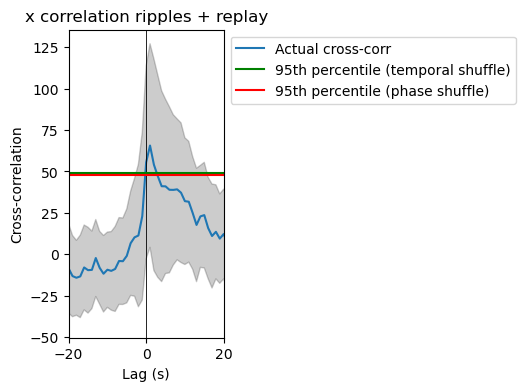

In [4]:
data = ED12_data_dict['spindle_replay_xcorr']

mean_x = data["mean_x"]
mean_y = data["mean_y"]
st_dev = data["st_dev"]

mean_y_shuf = data["mean_y_shuf"]
mean_y_shuf_2 = data["mean_y_shuf_2"]


plt.figure(figsize=(2,4))
plt.fill_between(mean_x, convolve_movmean(mean_y,2) - st_dev, convolve_movmean(mean_y,2) + st_dev, alpha=0.2, color='k')
plt.plot(mean_x, convolve_movmean(mean_y,2), label='Actual cross-corr')
plt.axvline(0, color='k', linewidth=0.6)
plt.axhline(np.percentile(mean_y_shuf,95),color = 'green',label='95th percentile (temporal shuffle)')
plt.axhline(np.percentile(mean_y_shuf_2,95),color = 'red',label='95th percentile (phase shuffle)')
plt.xlabel('Lag (s)')            # or 'Lag (ms)' if you multiply by 1000
plt.ylabel('Cross-correlation')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('x correlation ripples + replay')
plt.xlim(-20,20)


# figure G

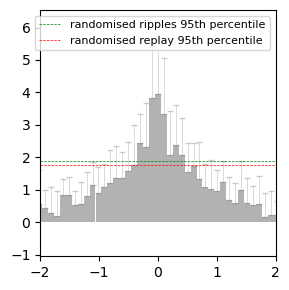

In [16]:
data = ED12_data_dict['ripple_replay_linkage']

bins = data["bins"]
bin_centres = data["bin_centres"]

mean_all_z_data = data["mean_all_z_data"]
std_all_z_data = data["std_all_z_data"]

all_rand_ripples_z_data = data["all_rand_ripples_z_data"]
all_rand_replay_z_data = data["all_rand_replay_z_data"]

fig, ax = plt.subplots(1, 1, figsize=(3, 3))

# Bin widths
widths = np.diff(bins)

# Error bar style
error_style = dict(
    ecolor="grey",
    elinewidth=0.5,
    capsize=2,
    alpha=0.4
)

# Main bar plot
ax.bar(
    bin_centres,
    mean_all_z_data,
    width=widths,
    yerr=[np.zeros_like(std_all_z_data), std_all_z_data],
    align="center",
    alpha=0.6,
    color="grey",
    error_kw=error_style
)

# 95th percentile thresholds
ripples_95 = np.percentile(
    np.mean(all_rand_ripples_z_data, axis=0),
    95
)

replay_95 = np.percentile(
    np.mean(all_rand_replay_z_data, axis=0),
    95
)

ax.axhline(
    ripples_95,
    color="green",
    lw=0.5,
    ls="--",
    label="randomised ripples 95th percentile"
)

ax.axhline(
    replay_95,
    color="red",
    lw=0.5,
    ls="--",
    label="randomised replay 95th percentile"
)

# Formatting
ax.set_xlim(-2, 2)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


# figure H

Text(0.5, 1.0, 'percentage of replay linked to SW-R')

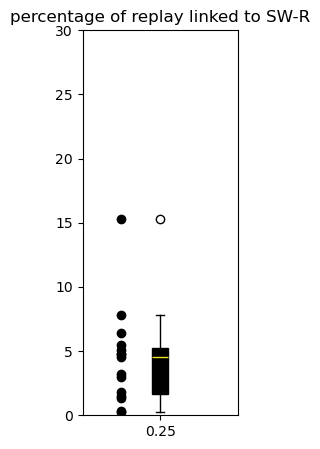

In [6]:
all_prop_replay_linked_to_SWR = ED12_data_dict['all_prop_replay_linked_to_SWR']

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.zeros(len(all_prop_replay_linked_to_SWR)), np.array(all_prop_replay_linked_to_SWR)*100, 'o', color = 'k')
ax.boxplot(np.array(all_prop_replay_linked_to_SWR)*100, positions=[0.25], widths=0.1, patch_artist=True, boxprops=dict(facecolor='k', color='k'), medianprops=dict(color='#EAE324'))
ax.set_ylim(0,30)
ax.set_title('percentage of replay linked to SW-R')

# figure I

Text(0.5, 1.0, 'percentage of SW-R linked to replay')

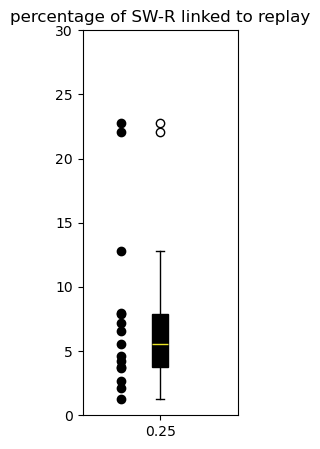

In [7]:
all_proportion_SWR_linked_to_replay = ED12_data_dict['all_prop_SWR_linked_to_replay']

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.zeros(len(all_proportion_SWR_linked_to_replay)), np.array(all_proportion_SWR_linked_to_replay)*100, 'o', color = 'k')
ax.boxplot(np.array(all_proportion_SWR_linked_to_replay)*100, positions=[0.25], widths=0.1, patch_artist=True, boxprops=dict(facecolor='k', color='k'), medianprops=dict(color='#EAE324'))
ax.set_ylim(0,30)
ax.set_title('percentage of SW-R linked to replay')


# figure J

-------------------
ShapiroResult(statistic=np.float64(0.8526833767818593), pvalue=np.float64(0.014924636965775477))
ShapiroResult(statistic=np.float64(0.9537153753161683), pvalue=np.float64(0.5178548726021497))
WilcoxonResult(statistic=np.float64(44.0), pvalue=np.float64(0.231201171875))
{'test': 'Wilcoxon signed-rank', 'W': np.float64(44.0), 'p': np.float64(0.231201171875), 'rank_biserial_r': np.float64(-0.35294117647058826)}
------------


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_25344\523969280.py:4: RuntimeWarning: Mean of empty slice
  linked_event_lens = [np.nanmean(item) for item in linked_event_lens]
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_25344\523969280.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print({"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]})


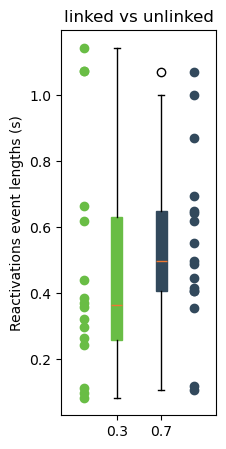

In [8]:
linked_event_lens = ED12_data_dict['linked']['event_lens']
unlinked_event_lens = ED12_data_dict['unlinked']['event_lens']

linked_event_lens = [np.nanmean(item) for item in linked_event_lens]
unlinked_event_lens = [np.nanmean(item) for item in unlinked_event_lens]

##############################################

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.zeros(len(linked_event_lens)), linked_event_lens, 'o', color = '#69BD45')
ax.boxplot([x for x in linked_event_lens if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))

ax.plot(np.ones(len(unlinked_event_lens)), unlinked_event_lens, 'o', color = '#32495C')
ax.boxplot([x for x in unlinked_event_lens if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#32495C', color='#32495C'), medianprops=dict(color='#EE7832'))

ax.set_ylabel('Reactivations event lengths (s)')

ax.set_title('linked vs unlinked')

print('-------------------')

a = [x for x in linked_event_lens if not np.isnan(x)]
b = [x for x in unlinked_event_lens if not np.isnan(x)]

print(scipy.stats.shapiro(a))
print(scipy.stats.shapiro(b))
# p is greater than 0.05 for both, so we fail to reject the null hypothesis that the data is normally distributed
# print(scipy.stats.ttest_ind(a,b))
# non parametric t test, using scipy Wilcoxon Rank-Sum test
print(scipy.stats.wilcoxon(linked_event_lens, unlinked_event_lens,nan_policy='omit'))

res = pg.wilcoxon(linked_event_lens, unlinked_event_lens, alternative='two-sided', nan_policy="omit")
print({"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]})
print('------------')

# figure K 

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_25344\230158986.py:9: RuntimeWarning: divide by zero encountered in divide
  linked_proportion_forward_v_reverse = np.array(linked_forward_total)/np.array(linked_reverse_total)
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_25344\230158986.py:9: RuntimeWarning: invalid value encountered in divide
  linked_proportion_forward_v_reverse = np.array(linked_forward_total)/np.array(linked_reverse_total)


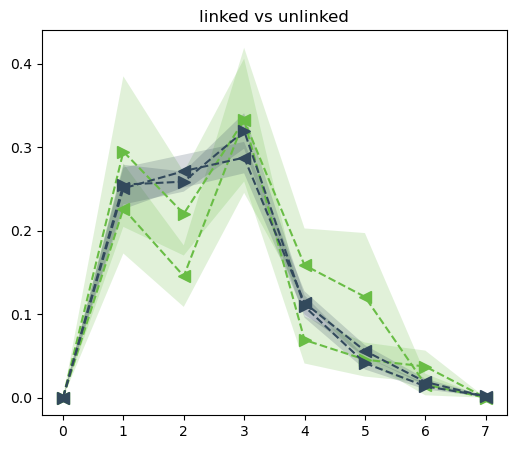

ShapiroResult(statistic=np.float64(0.6501603348748944), pvalue=np.float64(5.854544735932819e-15))
ShapiroResult(statistic=np.float64(0.6681953674656478), pvalue=np.float64(5.338123997694171e-14))
ShapiroResult(statistic=np.float64(0.8458340389026514), pvalue=np.float64(1.2881875455403877e-10))
ShapiroResult(statistic=np.float64(0.8626454165000563), pvalue=np.float64(6.725337037971675e-10))
 all are not normally distributed, so we will use a non-parametric test
-------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      27
number of groups                  2
test statistic             0.652919
p-value                    0.607839
number of permutations        10000
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.73695
-------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      34
number of groups                  2
test statistic            

c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_12\Utilities\utils.py:881: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return {"test": "Wilcoxon signed-rank", "W": res['W-val'][0], "p": res['p-val'][0], "rank_biserial_r": res['RBC'][0]}


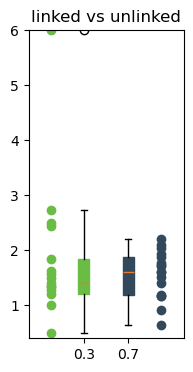

In [9]:
bins_ = [0.1, 0.2, 1,2, 5, 10,20,40]
animals_list = ED12_data_dict['linked']['animals']



###############################################################

linked_f_warp_factors, linked_r_warp_factors, linked_forward_total, linked_reverse_total = extract_mean_warps(pd.DataFrame(ED12_data_dict['linked']['regression']), bins_,animals_list)
linked_proportion_forward_v_reverse = np.array(linked_forward_total)/np.array(linked_reverse_total)
linked_proportion_forward_v_reverse = np.array([2.72727273, 0.14285714, 2.5       , 1.5       , 1.57142857,
       1.84      , 1.33333333, 2.44444444, 1.27272727, 6.        ,
              1.35,        1.4,        1.62, 1.        ,        1.2,
       0.5       , 0.        ])

unlinked_f_warp_factors, unlinked_r_warp_factors, unlinked_forward_total, unlinked_reverse_total = extract_mean_warps(pd.DataFrame(ED12_data_dict['unlinked']['regression']), bins_,animals_list)
unlinked_proportion_forward_v_reverse = np.array(unlinked_forward_total)/np.array(unlinked_reverse_total)

###############################################################

fig,ax = plt.subplots(1, 1,figsize=(6, 5))
color_ = '#69BD45'
plot_warp_factors(ax, linked_f_warp_factors, linked_r_warp_factors, bins_, color_)
color_ = '#32495C'
plot_warp_factors(ax, unlinked_f_warp_factors, unlinked_r_warp_factors, bins_, color_)
ax.set_title('linked vs unlinked')

plt.show()
## STATS
print(scipy.stats.shapiro([item for sublist in linked_f_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in linked_r_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in unlinked_f_warp_factors for item in sublist]))
print(scipy.stats.shapiro([item for sublist in unlinked_r_warp_factors for item in sublist]))
print(' all are not normally distributed, so we will use a non-parametric test')
    
print('-------------------')
permanova_forward_vs_reverse(linked_f_warp_factors, linked_r_warp_factors)
print('-------------------')
permanova_forward_vs_reverse(unlinked_f_warp_factors, unlinked_r_warp_factors)

######## INSET

fig, ax = plt.subplots(figsize=(2, 4))
ax.plot(np.zeros(len(linked_proportion_forward_v_reverse)),linked_proportion_forward_v_reverse,'o', color = '#69BD45')
ax.boxplot([x for x in linked_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#69BD45', color='#69BD45'), medianprops=dict(color='#EE7832'))
ax.plot(np.ones(len(unlinked_proportion_forward_v_reverse)),unlinked_proportion_forward_v_reverse,'o', color = '#32495C')
ax.boxplot([x for x in unlinked_proportion_forward_v_reverse if not np.isnan(x)], positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#32495C', color='#32495C'), medianprops=dict(color='#EE7832'))
ax.set_title('linked vs unlinked')
ax.set_ylim(0.4,6)

########## STATS
print('--------------------')
# Perform one-sample t-test
statistic, p_value = ttest_1samp(linked_proportion_forward_v_reverse, 1.0)
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
print(effect_size(x=linked_proportion_forward_v_reverse,test='one_sample_ttest',popmean = 1))

print('--------------------')
# Perform one-sample t-test
statistic, p_value = ttest_1samp(unlinked_proportion_forward_v_reverse, 1.0, nan_policy="omit")
# Print the test statistic and p-value
print("Test statistic:", statistic)
print("P-value:", p_value)
print(effect_size(x=unlinked_proportion_forward_v_reverse,test='one_sample_ttest',popmean = 1))


print(scipy.stats.shapiro(linked_proportion_forward_v_reverse))
print(scipy.stats.shapiro(unlinked_proportion_forward_v_reverse))

## not all normal so use wilcoxn signed rank
# print(scipy.stats.wilcoxon(nrem_proportion_forward_v_reverse, rem_proportion_forward_v_reverse,nan_policy='omit'))
# print(effect_size(x=nrem_proportion_forward_v_reverse, y=rem_proportion_forward_v_reverse, test='wilcoxon'))
print('------------------------------------------')
print(scipy.stats.wilcoxon(linked_proportion_forward_v_reverse, unlinked_proportion_forward_v_reverse, nan_policy='omit'))
print(effect_size(x=linked_proportion_forward_v_reverse, y=unlinked_proportion_forward_v_reverse, test='wilcoxon'))

# figure L

PLOT 2:
Group 1 (NREM):
model p value (f statistic) = 
5.1080692324608326e-05
r2 = 
0.7018370814363191
Group 2 (REM):
model p value (f statistic) = 
4.3731726584587205e-13
r2 = 
0.8713375311222806
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     32.95
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           5.11e-05
Time:                        07:35:35   Log-Likelihood:                 61.546
No. Observations:                  16   AIC:                            -119.1
Df Residuals:                      14   BIC:                            -117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
             

c:\miniconda\envs\proc_replay_2025\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


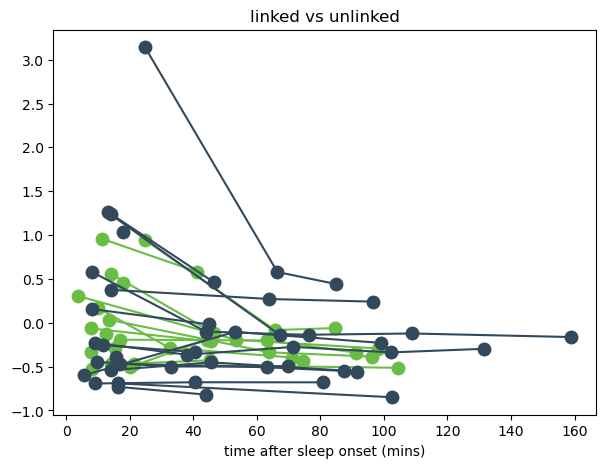

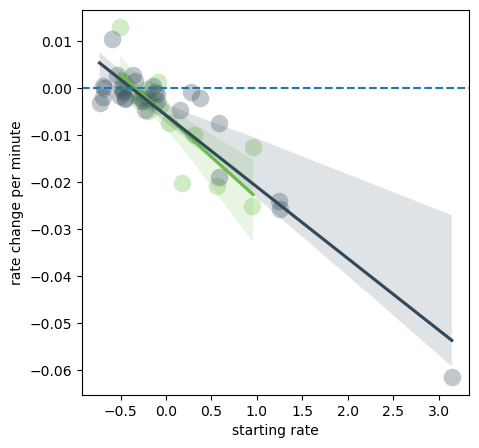

In [10]:
# 1. Flatten
flat = flatten(ED12_data_dict['linked']['binned_rate'])
# 2. Compute mean & std
mean = np.nanmean(flat)
std = np.nanstd(flat)
# 3. Recurse to z-score
normalized_linked = zscoreize(ED12_data_dict['linked']['binned_rate'], mean, std)


# 1. Flatten
flat = flatten(ED12_data_dict['unlinked']['binned_rate'])
# 2. Compute mean & std
mean = np.nanmean(flat)
std = np.nanstd(flat)
# 3. Recurse to z-score
normalized_unlinked = zscoreize(ED12_data_dict['unlinked']['binned_rate'], mean, std)


group1_data, group2_data = plot_decay(normalized_linked  ,ED12_data_dict['linked']['bins_relative_so'],normalized_unlinked ,ED12_data_dict['unlinked']['bins_relative_so'], '#69BD45','#32495C','linked vs unlinked')


###################### STATS
df1 = pd.DataFrame(group1_data)
df2 = pd.DataFrame(group2_data)
# Fit linear regression for Group 1
model_group1 = sm_l.OLS.from_formula('y ~ x', data=df1).fit()
model_group2 = sm_l.OLS.from_formula('y ~ x', data=df2).fit()

print('PLOT 2:')
# Print the summary of each model
print("Group 1 (NREM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)

print("Group 2 (REM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group2.f_pvalue)
print('r2 = ')
print(model_group2.rsquared)


### STATS
### effect of decay - significance
# Add a constant term to the independent variable
data = sm.add_constant(df1)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()
# Print the summary statistics
print(model.summary())
r = np.sign(model.params['x']) * np.sqrt(model.rsquared)
print(r)
print(model.rsquared)
print(model.pvalues['x'])

data = sm.add_constant(df2)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()
# Print the summary statistics
print(model.summary())
r = np.sign(model.params['x']) * np.sqrt(model.rsquared)
print(r)
print(model.rsquared)
print(model.pvalues['x'])

# Combine the data into one DataFrame
data = pd.concat([df1, df2], axis=0)

# Create a grouping variable
groups = np.array(['nrem'] * len(df1) + ['rem'] * len(df2))

# Perform MANOVA
manova = MANOVA.from_formula('x + y ~ groups', data=data)

# Print the MANOVA results
print(manova.mv_test())

# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)

# figure M

c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\envs\proc_replay_2025\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ShapiroResult(statistic=np.float64(0.9034944205189074), pvalue=np.float64(0.17596731336185))
ShapiroResult(statistic=np.float64(0.9261204799690287), pvalue=np.float64(0.3729504250022314))
ShapiroResult(statistic=np.float64(0.8811448737889472), pvalue=np.float64(0.09065815760136146))
ShapiroResult(statistic=np.float64(0.9018137842964645), pvalue=np.float64(0.19450107683666384))
ShapiroResult(statistic=np.float64(0.9599918367002463), pvalue=np.float64(0.6313269155839818))
ShapiroResult(statistic=np.float64(0.952572310514162), pvalue=np.float64(0.4984523235426101))
ShapiroResult(statistic=np.float64(0.9769238610165648), pvalue=np.float64(0.9240305240741548))
ShapiroResult(statistic=np.float64(0.9395429982119354), pvalue=np.float64(0.312806627585959))
_____________________________________________________________________________________________
                  Multivariate linear model
                                                              
-----------------------------------------

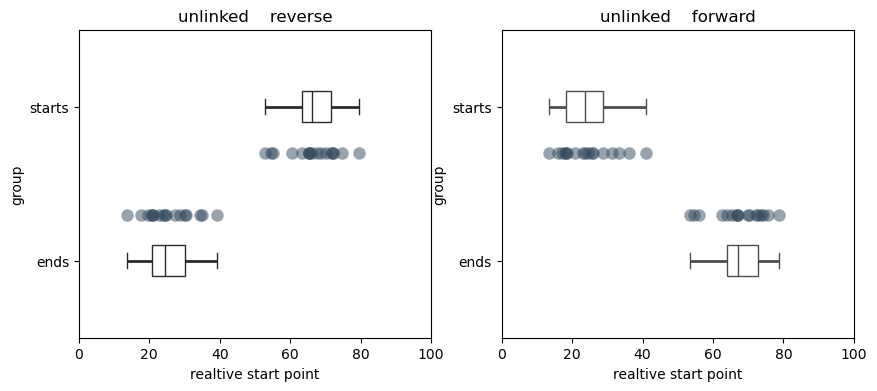

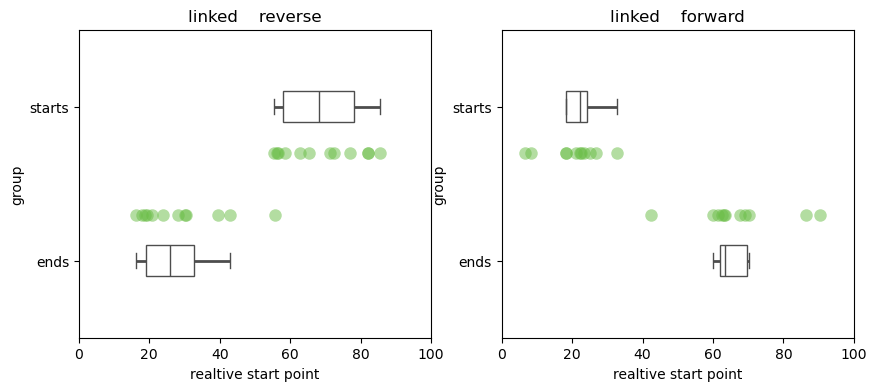

In [11]:

fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4))
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED12_data_dict['unlinked']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'unlinked','#32495C')

fig,[ax,ax2] = plt.subplots(1, 2,figsize=(10, 4))
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED12_data_dict['linked']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'linked','#69BD45')



linked_all_chunk_reverse_start_mean, linked_all_chunk_forward_start_mean, linked_all_chunk_reverse_end_mean, linked_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED12_data_dict['linked']['start_end']))
unlinked_all_chunk_reverse_start_mean, unlinked_all_chunk_forward_start_mean, unlinked_all_chunk_reverse_end_mean, unlinked_all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(ED12_data_dict['unlinked']['start_end']))

group1 = [x for x in linked_all_chunk_reverse_start_mean if not np.isnan(x)] 
group2 = [x for x in linked_all_chunk_forward_start_mean if not np.isnan(x)] 
group3 = [x for x in linked_all_chunk_reverse_end_mean if not np.isnan(x)] 
group4 = [x for x in linked_all_chunk_forward_end_mean if not np.isnan(x)] 
group5 = [x for x in unlinked_all_chunk_reverse_start_mean if not np.isnan(x)] 
group6 = [x for x in unlinked_all_chunk_forward_start_mean if not np.isnan(x)] 
group7 = [x for x in unlinked_all_chunk_reverse_end_mean if not np.isnan(x)] 
group8 = [x for x in unlinked_all_chunk_forward_end_mean if not np.isnan(x)] 

for group in [group1, group2, group3, group4, group5, group6, group7, group8]:
    print(scipy.stats.shapiro(group))
    
df_linked = pd.DataFrame({
    'group':       ['linked'] * len(linked_all_chunk_forward_start_mean),
    'forward_start': linked_all_chunk_forward_start_mean,
    'forward_end':   linked_all_chunk_forward_end_mean,
    'reverse_start': linked_all_chunk_reverse_start_mean,
    'reverse_end':   linked_all_chunk_reverse_end_mean,
})

df_unlinked = pd.DataFrame({
    'group':       ['unlinked'] * len(unlinked_all_chunk_forward_start_mean),
    'forward_start': unlinked_all_chunk_forward_start_mean,
    'forward_end':   unlinked_all_chunk_forward_end_mean,
    'reverse_start': unlinked_all_chunk_reverse_start_mean,
    'reverse_end':   unlinked_all_chunk_reverse_end_mean,
})


print('_____________________________________________________________________________________________')
from statsmodels.multivariate.manova import MANOVA
# Concatenate them:
df = pd.concat([df_linked, df_unlinked], ignore_index=True)
#  MANOVA
manova = MANOVA.from_formula('forward_start + forward_end +reverse_start +reverse_end  ~ group', data=df)
print(manova.mv_test())

# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)


# figure N

__________________
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      33
number of groups                  2
test statistic             0.228673
p-value                     0.89621
number of permutations        10000
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.78307


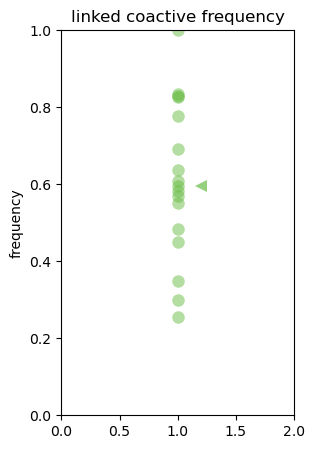

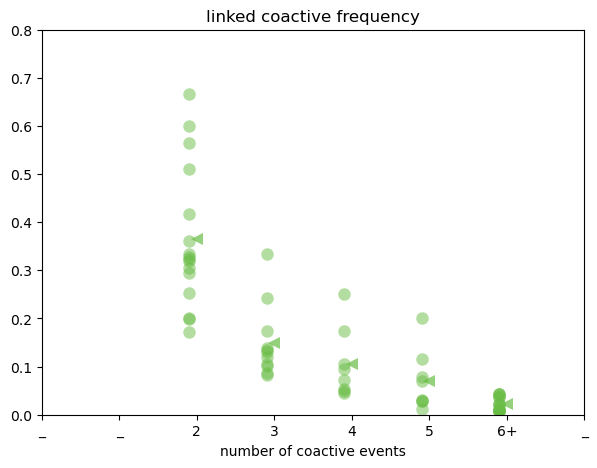

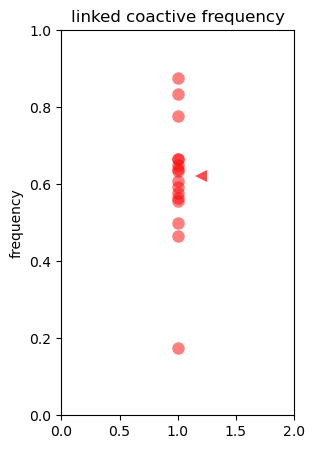

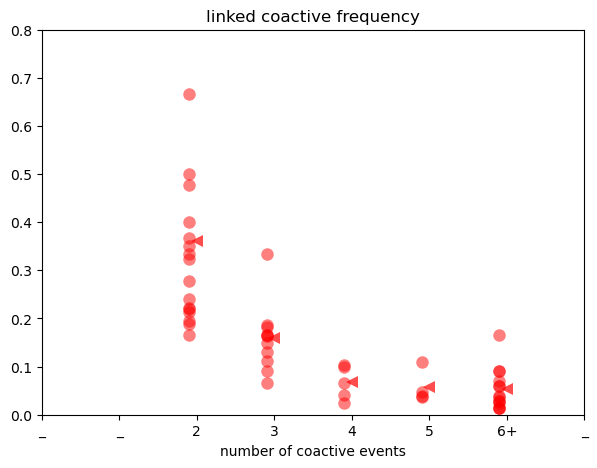

In [12]:
plot_coactive_single(convert_word_keys_to_numeric(ED12_data_dict['linked']['coactive_freqs']), '#69BD45','linked')
plot_coactive_two_plus(convert_word_keys_to_numeric(ED12_data_dict['linked']['coactive_freqs']), '#69BD45','linked')
plot_coactive_single(convert_word_keys_to_numeric(ED12_data_dict['linked']['rand_linked_coactive_freqs']), 'red','linked')
plot_coactive_two_plus(convert_word_keys_to_numeric(ED12_data_dict['linked']['rand_linked_coactive_freqs']), 'red','linked')

print('__________________')
df = permanova_coactive_freqs(convert_word_keys_to_numeric(ED12_data_dict['linked']['coactive_freqs']), convert_word_keys_to_numeric(ED12_data_dict['linked']['rand_linked_coactive_freqs']))


# figure O

------------------


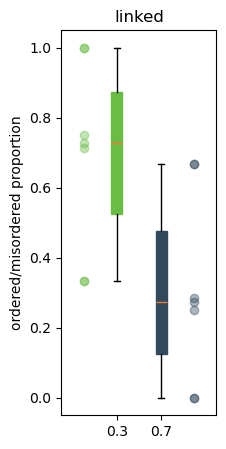

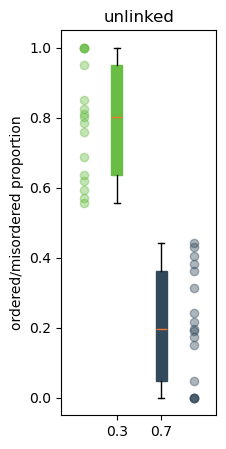

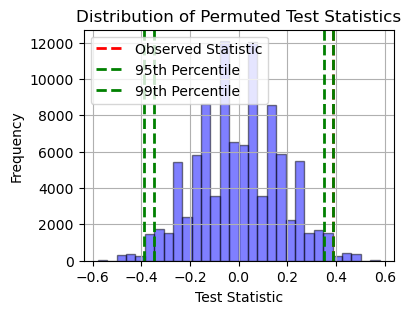

- p-value: 0.00984
- 99th percentile of permuted statistics: 0.38806431663574514
- Observed Test Statistic: 0.3880643166357452
cohens d = 1.4137352996865145
------------------


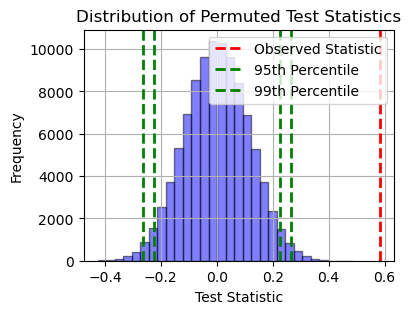

- p-value: 0.0
- 99th percentile of permuted statistics: 0.2662293828750759
- Observed Test Statistic: 0.5821773264449792
cohens d = 3.622343881937562
---------------------------------------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      24
number of groups                  2
test statistic             1.187419
p-value                       0.317
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.58287


In [13]:

plot_ordered_misrodered(ED12_data_dict['linked']['ordered_misordered'],'linked','ordered/misordered proportion')
# SaveFig('linked_ordered_disordered.pdf',r'C:\Users\Emmett Thompson\Documents\plots\\')
plot_ordered_misrodered(ED12_data_dict['unlinked']['ordered_misordered'],'unlinked','ordered/misordered proportion')

### STATs

print('------------------')
list5 = [float(item[0]) for item in ED12_data_dict['linked']['ordered_misordered']] 
list6 = [float(item[1]) for item in ED12_data_dict['linked']['ordered_misordered']] 
list5= [x for x in list5 if not np.isnan(x)] 
list6= [x for x in list6 if not np.isnan(x)] 
permutation_test(list5, list6)
print(f'cohens d = {cohens_d(list5, list6)}')

print('------------------')
list7 = [float(item[0]) for item in ED12_data_dict['unlinked']['ordered_misordered']] 
list8 = [float(item[1]) for item in ED12_data_dict['unlinked']['ordered_misordered']] 
list7= [x for x in list7 if not np.isnan(x)] 
list8= [x for x in list8 if not np.isnan(x)] 
permutation_test(list7, list8)
print(f'cohens d = {cohens_d(list7, list8)}')


print('---------------------------------------------------')
permanova_ordered_misordered(ED12_data_dict['linked']['ordered_misordered'], ED12_data_dict['unlinked']['ordered_misordered'])


# figure P

------------------


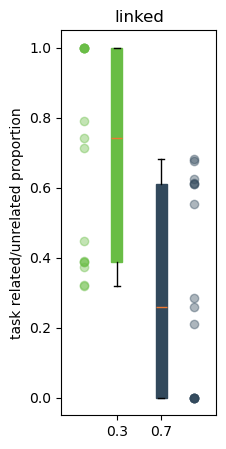

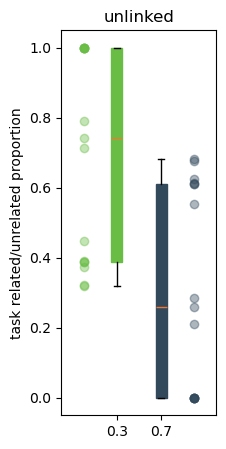

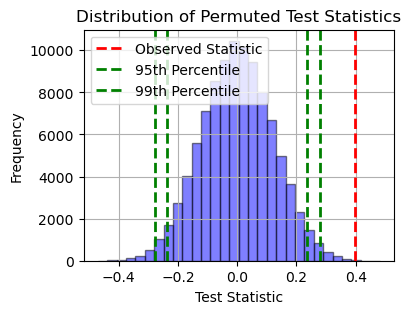

- p-value: 0.00025
- 99th percentile of permuted statistics: 0.27839485952763743
- Observed Test Statistic: 0.3969375064115581
cohens d = 1.3472485580005513
------------------


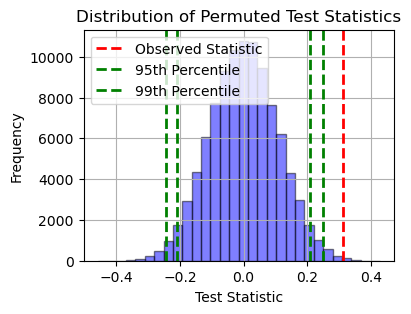

- p-value: 0.00159
- 99th percentile of permuted statistics: 0.24873710876190697
- Observed Test Statistic: 0.31177711950158005
cohens d = 1.137514476885624
---------------------------------------------------
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      34
number of groups                  2
test statistic             0.190344
p-value                       0.678
number of permutations          999
Name: PERMANOVA results, dtype: object
PERMANOVA effect size R²: 0.61094


In [14]:
plot_ordered_misrodered(ED12_data_dict['linked']['task_nontask'],'linked','task related/unrelated proportion')

plot_ordered_misrodered(ED12_data_dict['linked']['task_nontask'],'unlinked','task related/unrelated proportion')



print('------------------')
list5 = [float(item[0]) for item in ED12_data_dict['linked']['task_nontask']] 
list6 = [float(item[1]) for item in ED12_data_dict['linked']['task_nontask']] 
list5= [x for x in list5 if not np.isnan(x)] 
list6= [x for x in list6 if not np.isnan(x)] 
permutation_test(list5, list6)
print(f'cohens d = {cohens_d(list5, list6)}')

print('------------------')
list7 = [float(item[0]) for item in ED12_data_dict['unlinked']['task_nontask']] 
list8 = [float(item[1]) for item in ED12_data_dict['unlinked']['task_nontask']] 
list7= [x for x in list7 if not np.isnan(x)] 
list8= [x for x in list8 if not np.isnan(x)] 
permutation_test(list7, list8)
print(f'cohens d = {cohens_d(list7, list8)}')

print('---------------------------------------------------')
permanova_ordered_misordered(ED12_data_dict['linked']['task_nontask'], ED12_data_dict['unlinked']['task_nontask'])


# figure Q

Fitted parameters: a = 0.04905225359378278, b = 2.7386562630034237
R-squared: 0.9859114510088116
p-values: [np.float64(3.418490635542781e-05), np.float64(1.0165275310392019e-07)]
Fitted parameters: a = 0.051518362579264496, b = 2.762625641144213
R-squared: 0.9888747584144898
p-values: [np.float64(1.5175370373210484e-05), np.float64(3.9329543621846597e-08)]
_________________________________________________________________________________________
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.4435 2.0000 17.0000 10.6643 0.0010
         Pillai's trace 0.5565 2.0000 17.0000 10.6643 0.0010
 Hotelling-Lawley trace 1.2546 2.0000 17.0000 10.6643 0.0010
    Roy's greatest root 1.2546 2.0000 17.0000 10.6643 0.0010
--------------------

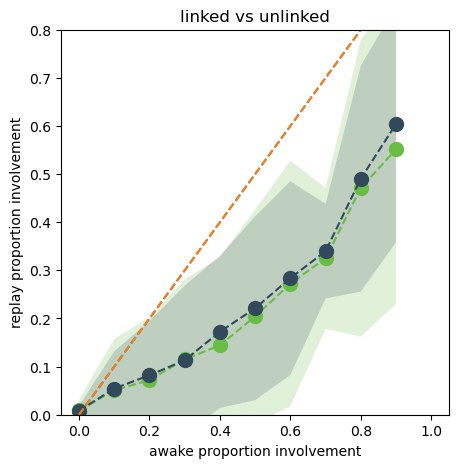

In [15]:
awake_seqbyseq_neuron_involvements = ED12_data_dict['neuron_involvement']['awake_seqbyseq_neuron_involvements']


fig, ax = plt.subplots(1, 1,figsize=(5, 5))
linked_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_seqbyseq_neuron_involvements,ED12_data_dict['linked']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(linked_awake_sleep_relationship,'#69BD45',ax)
unlinked_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(awake_seqbyseq_neuron_involvements,ED12_data_dict['unlinked']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(unlinked_awake_sleep_relationship,'#32495C',ax)
ax.set_title('linked vs unlinked')

print('_________________________________________________________________________________________')
m =manova_groups_neuron_involvement(linked_awake_sleep_relationship,unlinked_awake_sleep_relationship)
eta_squared = compute_partial_eta_squared(m)
print("Partial eta-squared for each effect:", eta_squared)

